In [1]:
#######################################################################################
## Script written by Gabrielle G. Jones and Schuyler R. Borges. 
## This script was written to create spectra of every microorganism with their
## biosignatures removed. Iron oxide slopes were averaged to replace the red edge in
## black and orange microbial mat spectra, and linear fits were created between local 
## maxima of pigment absorptions to replace these biosignatures. The script for 
## creating Figures 3 and 4 from the manuscript are included here as well.
#######################################################################################

#######################################################################################
## List of definition functions to run first
#######################################################################################


# Definition function that takes a .txt file and returns the wavelength and reflectance
# of the file. This definition basically formats the Kokaly et al. 2017 data files in 
# a particular format for the script to call
def getData(data):                          # Input data
    
    lines = data.readlines()                # Reads in data
    
    wavelength = []                         # Builds empty list for wavelength
    reflect = []                            # Builds empty list for reflectance
    
    for value in lines:                     

        wl = float(value.split()[0])        # Defines wl as a list of values from file
        w2 = float(value.split()[1])        # Defines w2 as a list of values from file
        wavelength.append(wl)               # Appends values from wl to empty list, wavelength
        reflect.append(w2)                  # Appends values from w2 to empty list, reflect
    
    return wavelength, reflect              # When calling definition function, it will return two values: wavelength and reflectance


# Definition function that ensures clipped wavelength and reflectance is ordered from smallest to largest
def clipIron(dataWave, dataRef, startVal, endVal):                  # Input four values: wavelength, reflectance, start value, and end value
    
    tempArrayWave = []                                              # Builds empty list
    tempArrayRef = []                                               # Builds empty list
    
    # Ensures wavelength values are in order from smallest to largest
    for i in range(len(dataWave)):
        
        if( dataWave[i] > startVal and dataWave[i] < endVal ):      # If values in dataWave are greater than startVal and less than endVal then...
            
            tempArrayWave.append(dataWave[i])                       # Appends values from dataWave to empty list
            tempArrayRef.append(dataRef[i])                         # Appends values from dataRef to empty list
            
    return np.asarray(tempArrayWave), np.asarray(tempArrayRef)      # Returns two arrays: wavelength values and reflectance values


# Definition function that is a linear equation
def LinearFunc(x, A, B):        # Input x, co-efficient of x, and y-intercept
    y = A*x + B                 # Linear equation
    return y                    # Returns y-value of a point on the line

In [3]:
#######################################################################################
## Importing all packages required for the script
#######################################################################################


from scipy.optimize import curve_fit
import numpy as np
import os, glob
import math
from math import log10, floor
from pathlib import Path
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
import matplotlib.font_manager as font_manager
import coronagraph as cg
from astropy.io import ascii 
from astropy.table import vstack, Table
import pandas as pd
from sigfig import round


#######################################################################################
## Opening all iron oxide spectra
#######################################################################################


# Change file name below to reflect file names downloaded from Kokaly et al. 2017
data = open('ironoxide.txt','r')

# Use getData definition to create wavelength and reflectance arrays
ironwave, ironref = getData(data)   
ironwave = np.asarray(ironwave)
ironref = np.asarray(ironref)

data.close()

# Change file name below to reflect file names downloaded from Kokaly et al. 2017
data = open('ironHydroxide.txt','r')

# Use getData definition to create wavelength and reflectance arrays
irhywave, irhyref = getData(data)   
irhywave = np.asarray(irhywave)
irhyref = np.asarray(irhyref)

data.close()

# Change file name below to reflect file names downloaded from Kokaly et al. 2017
data = open('Iron_Oxide_SA.txt','r')

# Use getData definition to create wavelength and reflectance arrays
ironSAwave, ironSAref = getData(data)
ironSAwave = np.asarray(ironSAwave)
ironSAref = np.asarray(ironSAref)

data.close()

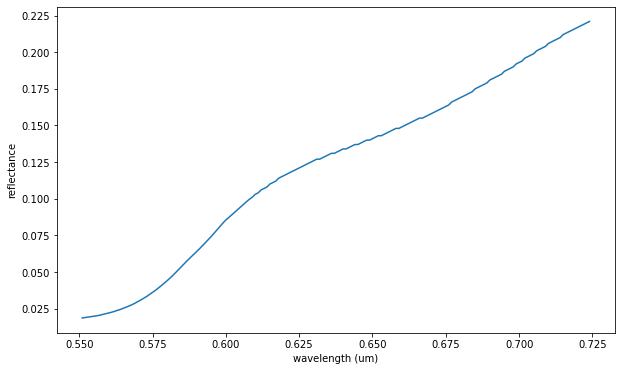

1.191042569630121
-0.6366333163001217


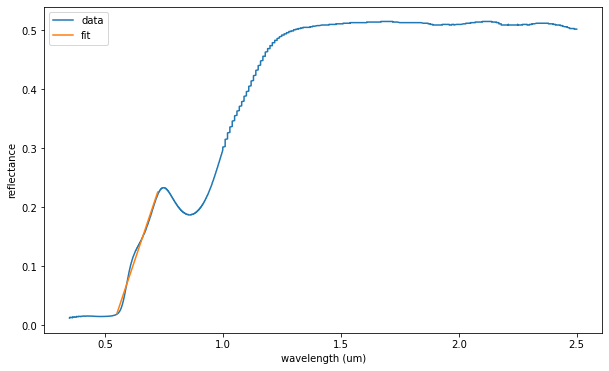

In [23]:
#######################################################################################
## Determining slopes for each "red edge" of all iron oxide spectra
#######################################################################################

# Finding the linear fit of the "red edge" for iron oxide spectrum.


# Defining the part of the spectrum that acts as a potential "red edge"
ironwaveRE, ironrefRE = clipIron(ironwave, ironref, 0.55, 0.725 )

# Curve_fit takes a function (LinearFunc in our case), x data, and y data
# to determine the optimized A and B values from LinearFunc (parameters)
# and their associated error (covariance).
parameters, covariance = curve_fit(LinearFunc, ironwaveRE, ironrefRE)

# Saving A and B values from curve_fit's parameters as separate lists
fit_A = parameters[0]
fit_B = parameters[1]
# Prints A and B values
print(fit_A)
print(fit_B)

# Plots the slope found from the optimized A and B values with 
# the original reflectance data
fit_y = LinearFunc(ironwaveRE, fit_A, fit_B)

plt.figure(figsize=(10,6))
plt.plot(ironwave, ironref, label='data')
plt.plot(ironwaveRE, fit_y, '-', label='fit')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.legend()
plt.show()

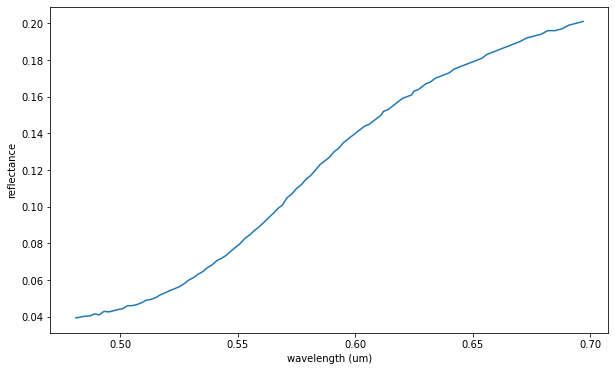

0.8907358204143991
-0.40238568006252673


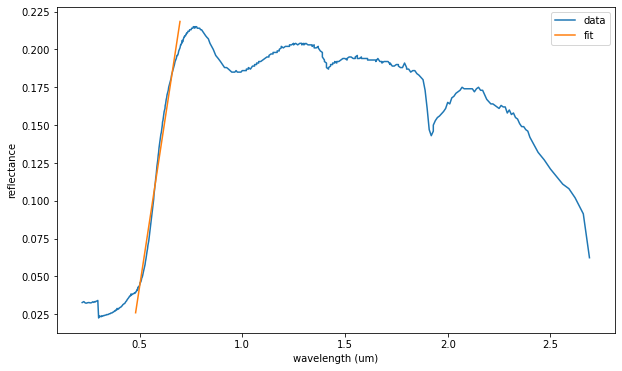

In [25]:
# Finding the slope or linear fit of the "red edge" for iron hydroxide spectrum


# Defining the part of the spectrum that acts as a potential "red edge"
irhywaveRE, irhyrefRE = clipIron(irhywave, irhyref, 0.48, 0.70 )

# Curve_fit takes a function (LinearFunc in our case), x data, and y data
# to determine the optimized A and B values from LinearFunc (parameters)
# and their associated error (covariance).
parameters, covariance = curve_fit(LinearFunc, irhywaveRE, irhyrefRE)

# Saving A and B values from curve_fit's parameters as separate lists
fit_A = parameters[0]
fit_B = parameters[1]

# Prints A and B values
print(fit_A)
print(fit_B)

# Plots the slope found from the optimized A and B values with 
# the original reflectance data
fit_y = LinearFunc(irhywaveRE, fit_A, fit_B)

plt.figure(figsize=(10,6))
plt.plot(irhywave, irhyref, label='data')
plt.plot(irhywaveRE, fit_y, '-', label='fit')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.legend()
plt.show()

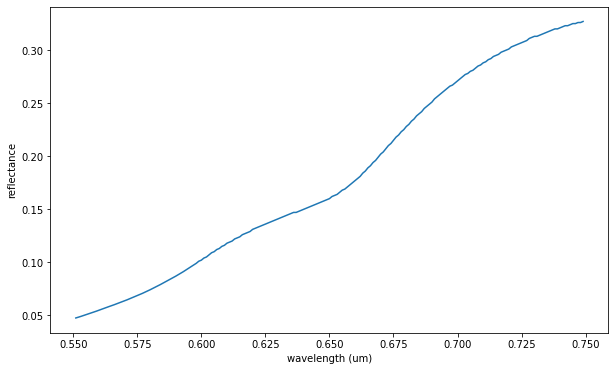

1.5583592188465953
-0.8319269596152556


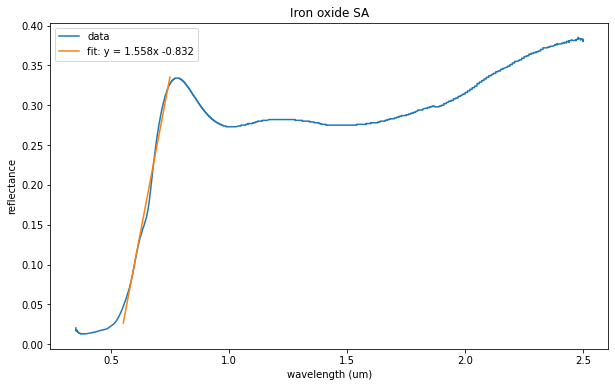

In [26]:
# Finding the slope or linear fit of the "red edge" for iron oxide SA spectrum


# Defining the part of the spectrum that acts as a potential "red edge"
ironSAwaveRE, ironSArefRE = clipIron(ironSAwave, ironSAref, 0.55, 0.75 )

# Curve_fit takes a function (LinearFunc in our case), x data, and y data
# to determine the optimized A and B values from LinearFunc (parameters)
# and their associated error (covariance).
parameters, covariance = curve_fit(LinearFunc, ironSAwaveRE, ironSArefRE)

# Saving A and B values from curve_fit's parameters as separate lists
fit_A = parameters[0]
fit_B = parameters[1]
# Prints A and B values
print(fit_A)
print(fit_B)

# Plots the slope found from the optimized A and B values with 
# the original reflectance data
fit_y = LinearFunc(ironSAwaveRE, fit_A, fit_B)

plt.figure(figsize=(10,6))
plt.plot(ironSAwave, ironSAref, label='data')
plt.plot(ironSAwaveRE, fit_y, '-', label='fit: y = 1.558x - 0.832')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.title("Iron oxide SA")
plt.legend()
plt.show()

[0.0475 0.0482 0.049  0.0498 0.0506 0.0514 0.0522 0.0531 0.0539 0.0548
 0.0556 0.0565 0.0574 0.0583 0.0591 0.06   0.0609 0.0618 0.0627 0.0637
 0.0646 0.0656 0.0666 0.0676 0.0686 0.0696 0.0707 0.0718 0.0729 0.0741
 0.0753 0.0765 0.0777 0.079  0.0803 0.0816 0.0829 0.0842 0.0856 0.0869
 0.0883 0.0898 0.0912 0.0928 0.0943 0.0959 0.0974 0.099  0.101  0.102
 0.104  0.105  0.107  0.109  0.11   0.112  0.113  0.115  0.116  0.118
 0.119  0.12   0.122  0.123  0.124  0.126  0.127  0.128  0.129  0.131
 0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.139  0.14   0.141
 0.142  0.143  0.144  0.145  0.146  0.147  0.147  0.148  0.149  0.15
 0.151  0.152  0.153  0.154  0.155  0.156  0.157  0.158  0.159  0.16
 0.162  0.163  0.164  0.166  0.168  0.169  0.171  0.173  0.175  0.177
 0.179  0.181  0.184  0.186  0.189  0.191  0.194  0.196  0.199  0.202
 0.204  0.207  0.21   0.212  0.215  0.218  0.22   0.223  0.225  0.228
 0.23   0.233  0.235  0.238  0.24   0.242  0.245  0.247  0.249  0.251
 0.254  0.256  0.2

ValueError: x and y must have same first dimension, but have shapes (199,) and (1,)

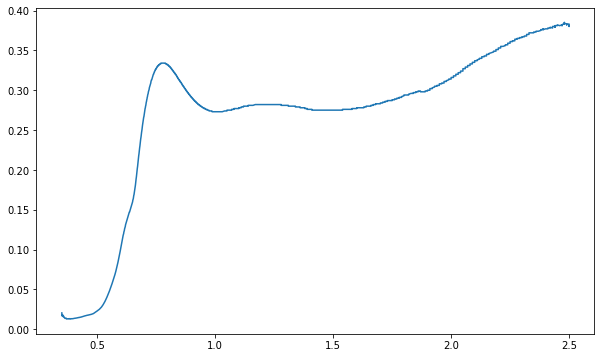

In [35]:
#######################################################################################
## Saving average iron oxide slope
#######################################################################################


scrub = []
print(ironSArefRE)
scrub = np.arange(ironSArefRE[0], ironSArefRE[len(ironSArefRE) - 1], 1.15, dtype=float)
print(scrub)

# slope = y2 - y1 / x2 - x1

plt.figure(figsize=(10,6))
plt.plot(ironSAwave, ironSAref, label='data')
plt.plot(ironSAwaveRE, scrub, '-', label='fit: y = 1.558x - 0.832')
plt.xlabel("wavelength (um)")
plt.ylabel("reflectance")
plt.title("Iron oxide SA")
plt.legend()
plt.show()

In [21]:
#dt: 
# ironoxide:     1.1510191872550515
# ironHydroxide: 0.6563271460248854
# Iron_Oxide_SA: 1.5583592188465953
# Iron_Oxide_GA: 0.010788917685621749

In [ ]:
#######################################################################################
## Plotting average iron oxide slope, Figure 3
#######################################################################################


font = {'fontname':'Arial'}

legparams = font_manager.FontProperties(family = 'Arial', size = 15)

fig = plt.figure(facecolor='white', figsize=(7,5))
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 25, **font, x=0.5, y=-0.1)
fig.supylabel('Reflectance', fontsize = 25, **font,  x=-0.05, y=0.5)
xlim=(0.4,1.030)
ylim=(0,0.35)


# Average slope
x = np.linspace(0.55, 0.8, 100)
y = (1.1343*x) - 0.58058

ax0 = fig.add_subplot()
#ax0.plot(wavelength, black.columns[1], c = 'xkcd:black', lw = 3.0, ls = 'solid', label='Black Microbial Mat')
ax0.plot(wavelength, iron_SA.columns[1], c = 'xkcd:pink', lw = 3.0, ls = 'dotted', label='Iron Oxide Mineral')
#ax0.plot(wavelength, iron_GA.columns[1], c = 'xkcd:red orange', lw = 3.0, ls = 'solid', label = 'Iron Oxide GA')
ax0.plot(wavelength2, iron_hydroxide.columns[1], c = 'xkcd:magenta', lw = 3.0, ls = 'dashed', label='Iron Hydroxide')
ax0.plot(wavelength, iron_oxide.columns[1], c = 'xkcd:purple', lw = 3.0, ls = 'dashdot', label='Iron Oxide Paint')
ax0.plot(x,y, c='xkcd:blue',lw = 3.0, ls = "solid", label='Average slope')
ax0.plot()
#ax0.set_title('Black Microbial Mat', fontsize = 35, **font)
ax0.tick_params(axis='both', direction='in', length=10, width=1, labelsize=20)
for tick in ax0.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax0.get_yticklabels():
    tick.set_fontname("Arial")
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xticks(np.arange(0.4, 1.03, step=0.2))
ax0.set_yticks(np.arange(0.1, 0.35, step=0.1))
ax0.legend(loc='upper left', prop = legparams, frameon=False)
ax0.plot()

#plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure3.tif', format='tif', bbox_inches="tight")

In [ ]:
#######################################################################################
## Creating abiotic spectra for black and orange microbial mat using the average iron
## oxide slope found above
#######################################################################################



In [ ]:
#######################################################################################
## Creating abiotic spectra for Arthrobacter sp. and Ectothiorhodospira sp. str. BSL-9
## by linearly fitting local maxima across spectral biosignatures
#######################################################################################

#Redoing abiotic spectrum for Arthrobacter sp.

#continuum (slope taken between 0.35 and 0.6 um and b calculated from those points)
x = np.round(np.arange(0.350, 0.601, 0.001),3)
y = (1.0741584*x) - 0.32704904
#y = float('%.6g' % ((1.0741584*x) - 0.32704904))


def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

y_sig_figs = signif(y, 6)

two_rows = np.array([x,y_sig_figs])

#arthro
biotic_wave = np.array(arthro.columns[0][251:]*10**(-3))
biotic_ref = np.array(arthro.columns[1][251:])

#pandas
list_of_values = {'wavelength': two_rows[0], 'reflectance': two_rows[1]}
abiotic_df = pd.DataFrame(data=list_of_values)

arthro_df = np.array([biotic_wave, biotic_ref])
biotic_df = pd.DataFrame({'wavelength': arthro_df[0], 'reflectance': arthro_df[1]})

arthro_scrub_df = pd.concat([abiotic_df,biotic_df])

#write to text file
#one space between values
#arthro_scrub_df.to_csv(data_folder/'arthro_scrub2_test5.txt', sep=' ', encoding='utf-8', index=False, header=False)
#six spaces between values
myCsv = arthro_scrub_df.astype(str).apply(lambda x: '      '.join(x), axis=1)
myCsv.rename('   '.join(arthro_scrub_df.columns)).to_csv(data_folder/'arthro_scrub2.txt', header=False, index=False)

#astropy Table
table = Table([np.round(x,3),y_sig_figs])
table2 = Table([biotic_wave, biotic_ref])
table3 = vstack([table, table2])

#ascii.write(table3, data_folder/'arthro_scrub2_ascii.txt', data_start=1, delimiter=' ')

In [ ]:
#######################################################################################
## Plotting biological and abiological surface spectra, Figure 4
#######################################################################################


os.chdir('/Users/schuylerraeschroerborges/Desktop/Second_Project/')

black=ascii.read("bestblackmat.txt", data_start=1, delimiter='\s')
bscrub=ascii.read("black_scrubbed.txt", data_start=0, delimiter='\s')
orange=ascii.read("bestorangemat.txt", data_start=1, delimiter='\s')
oscrub=ascii.read("orangemat_scrubbed.txt", data_start=0, delimiter='\s')
arthro=ascii.read("Arthrobacter.txt", data_start=0, delimiter='\s')
ascrub=ascii.read("Arthro_pigment_scrub.txt", data_start=0, delimiter='\s')
ascrub2=ascii.read("arthro_scrub3.txt", data_start=0, delimiter='\s')
ecto=ascii.read("Ectothiorhodospira.txt", data_start=0, delimiter='\s')
escrub=ascii.read("Ectoth_pigment_scrub.txt", data_start=0, delimiter='\s')
iron_GA = ascii.read("Iron_oxide_GA.txt", data_start=0, delimiter='\s')
iron_SA = ascii.read("Iron_Oxide_SA.txt", data_start=0, delimiter='\s')
iron_hydroxide = ascii.read('ironHydroxide.txt', data_start=0, delimiter='\s')
iron_oxide = ascii.read("ironoxide.txt", data_start=0, delimiter='\s')

wavelength=black['Wavelength']*10**(-3)
wavelength2=iron_hydroxide.columns[0]

font = {'fontname':'Arial'}
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.it']= 'Arial:italic'
plt.rcParams['mathtext.cal']= 'Arial:italic'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams["mathtext.fontset"] = 'custom'

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 20)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=0.2, wspace=0.05)
fig.supxlabel('Wavelength (' + u'\u03bc' + 'm)', fontsize = 50, x=0.5, y=0.04, **font)
fig.supylabel('Reflectance', fontsize = 50, x=0.05, y=0.5, **font)
xlim=(0.4,1.030)
ylim=(0,0.5)
plt.setp(axs, xlim=xlim, ylim=ylim)
legparams = font_manager.FontProperties(family = 'Arial', size = 40)


# Black mat
axs[0,0].plot(wavelength, black.columns[1], 'xkcd:black',linewidth=6, label = 'Biotic')
axs[0,0].plot(wavelength, bscrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[0,0].set_title('a.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[0,0].set_title('Black Microbial Mat', fontsize = 50, **font)
axs[0,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[0,0].axvspan(xmin=0.8, xmax=1.03, facecolor='xkcd:grey', alpha=0.15)
axs[0,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,0].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,0].xaxis.set_ticklabels([])

# Orange mat
axs[0,1].plot(wavelength, orange.columns[1], 'xkcd:orange',linewidth=6, label = 'Biotic')
axs[0,1].plot(wavelength, oscrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[0,1].set_title('b.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[0,1].set_title('Orange Microbial Mat', fontsize = 50, **font)
axs[0,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[0,1].axvspan(xmin=0.64, xmax=0.83, facecolor='xkcd:grey', alpha=0.15)
axs[0,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[0,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[0,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[0,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[0,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[0,1].yaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])

# Arthrobacter
axs[1,0].plot(wavelength, arthro.columns[1], 'xkcd:peach',linewidth=6, label = 'Biotic')
axs[1,0].plot(wavelength, ascrub2.columns[1], 'xkcd:blue',linewidth=6, ls= 'dashed', label = 'Abiotic')
#axs[1,0].set_title('c.', fontsize = 50, **font, x = 0.08, y = 1.03)
axs[1,0].set_title('$\it{Arthrobacter}$ sp.', fontsize = 50, **font)
axs[1,0].tick_params(axis='both', direction='in', length=10, width=4, labelsize=43)
axs[1,0].axvspan(xmin=0.35, xmax=0.58, facecolor='xkcd:grey', alpha=0.15)
axs[1,0].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,0].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,0].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,0].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,0].get_yticklabels():
    tick.set_fontname("Arial")

# Ectothiorhodospira
axs[1,1].plot(wavelength, ecto.columns[1], 'xkcd:red orange',linewidth=6, label = 'Biotic')
axs[1,1].plot(wavelength, escrub.columns[1], 'xkcd:blue',linewidth=6, ls = 'dashed', label = 'Abiotic')
#axs[1,1].set_title('d.', fontsize = 50, **font, x = 0.1, y = 1.03)
axs[1,1].set_title('$\it{Ectothiorhodospira}$ sp. str. BSL-9', fontsize = 50, **font)
axs[1,1].tick_params(axis='both', direction='in',length=10, width=4, labelsize=43)
axs[1,1].axvspan(xmin=0.4, xmax=0.95, facecolor='xkcd:grey', alpha=0.15)
axs[1,1].set_yticks(np.arange(0.1, 0.6, step=0.2))
axs[1,1].set_xticks(np.arange(0.4, 1.03, step=0.2))
#axs[1,1].legend(fontsize = 40, ncol=1, prop = legparams, frameon=False, loc = 'upper left')
for tick in axs[1,1].get_xticklabels():
    tick.set_fontname("Arial")
for tick in axs[1,1].get_yticklabels():
    tick.set_fontname("Arial")
axs[1,1].yaxis.set_ticklabels([])

#plt.savefig('/Users/schuylerraeschroerborges/Downloads/Figure4.tif', format='tif')